In [155]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [156]:
cwd = os.getcwd()
df = pd.read_csv(os.getcwd()+'/preprossed data/preprocessed_data.csv')
df['days_rented'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days
df

,listing_id,price,available,min_nights,max_nights,host_since,host_response_rate,host_acceptance_rate,accommodates,bathrooms,...,park,shops_and_retail,supermarket,transport_and_infrastructure,Essentials,Hair_dryer,Kitchen,Wifi,dataset_type,days_rented
0,40625,164.0,0,1,365,2010-07-20,1.0,0.0,4,1.0,...,1,1,1,1,1,1,1,1,train,6
1,40625,164.0,0,1,365,2010-07-20,1.0,0.0,4,1.0,...,1,1,1,1,1,1,1,1,train,6
2,40625,164.0,0,1,365,2010-07-20,1.0,0.0,4,1.0,...,1,1,1,1,1,1,1,1,train,6
3,40625,164.0,0,1,365,2010-07-20,1.0,0.0,4,1.0,...,1,1,1,1,1,1,1,1,train,6
4,40625,164.0,0,1,365,2010-07-20,1.0,0.0,4,1.0,...,1,1,1,1,1,1,1,1,train,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398885,1241959973134398458,145.0,0,3,90,2017-01-07,1.0,0.0,4,1.0,...,0,1,1,1,0,0,1,1,test,6
398886,1241959973134398458,145.0,0,3,90,2017-01-07,1.0,0.0,4,1.0,...,0,1,1,1,0,0,1,1,test,6
398887,1241959973134398458,145.0,0,3,90,2017-01-07,1.0,0.0,4,1.0,...,0,1,1,1,0,0,1,1,test,6
398888,1241959973134398458,145.0,0,3,90,2017-01-07,1.0,0.0,4,1.0,...,0,1,1,1,0,0,1,1,test,6


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398890 entries, 0 to 398889
Data columns (total 71 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   listing_id                              398890 non-null  int64  
 1   price                                   398890 non-null  float64
 2   available                               398890 non-null  int64  
 3   min_nights                              398890 non-null  int64  
 4   max_nights                              398890 non-null  int64  
 5   host_since                              398890 non-null  object 
 6   host_response_rate                      398890 non-null  float64
 7   host_acceptance_rate                    398890 non-null  float64
 8   accommodates                            398890 non-null  int64  
 9   bathrooms                               398890 non-null  float64
 10  bedrooms                                3988

In [158]:
df = df.drop(columns=['start_date', 'end_date',
                                      'host_since',
                                      'amenities'])

In [159]:
# Columns to exclude
exclude_columns = ['days_rented','price']
df['income_per_period_rented'] = df['price'] * df['days_rented']
df = df.drop(exclude_columns, axis=1)
aggregated_df = df.groupby('listing_id').agg(total_income=('income_per_period_rented', 'sum')).reset_index()

df = pd.merge(df, aggregated_df, on='listing_id', how='left').drop_duplicates(subset=['listing_id'])
df

,listing_id,available,min_nights,max_nights,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,number_of_reviews,...,shops_and_retail,supermarket,transport_and_infrastructure,Essentials,Hair_dryer,Kitchen,Wifi,dataset_type,income_per_period_rented,total_income
0,40625,0,1,365,1.0,0.0,4,1.0,2.0,217,...,1,1,1,1,1,1,1,train,984.0,8856.0
9,51287,0,31,1125,1.0,1.0,2,1.0,0.0,380,...,1,1,1,1,1,1,1,train,480.0,9600.0
29,78416,0,1,1125,0.0,0.0,4,1.0,1.0,178,...,1,1,1,1,1,1,1,train,360.0,13680.0
67,90247,0,1,1125,1.0,1.0,4,1.0,1.0,773,...,1,1,1,1,1,1,1,train,768.0,3072.0
71,109679,0,1,365,1.0,0.0,4,1.0,0.0,143,...,1,1,1,1,1,1,1,train,636.0,10812.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398752,1239140056231491458,0,1,179,0.0,0.0,3,1.0,1.0,0,...,1,1,1,1,0,1,0,test,5994.0,293706.0
398801,1240620938572140331,0,1,365,1.0,0.0,2,1.0,1.0,0,...,1,1,1,0,0,1,1,test,300.0,600.0
398803,1241934283646689281,0,7,27,1.0,1.0,2,1.0,1.0,0,...,1,1,1,1,1,0,1,test,5994.0,5994.0
398804,1241952034287247871,0,1,90,1.0,1.0,4,1.0,1.0,0,...,1,1,1,1,1,1,1,test,492.0,19188.0


In [160]:
df.nunique()

listing_id                  12942
available                       1
min_nights                     76
max_nights                    166
host_response_rate              2
                            ...  
Kitchen                         2
Wifi                            2
dataset_type                    3
income_per_period_rented      474
total_income                 2641
Length: 67, dtype: int64

In [161]:
df = df.drop('income_per_period_rented', axis=1)

In [162]:
df.describe()

,listing_id,available,min_nights,max_nights,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,number_of_reviews,...,other,park,shops_and_retail,supermarket,transport_and_infrastructure,Essentials,Hair_dryer,Kitchen,Wifi,total_income
count,1.294200e+04,12942.0,12942.000000,1.294200e+04,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,...,12942.0,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,1.294200e+04
mean,4.772104e+17,0.0,8.439963,6.643985e+05,0.536779,0.358523,3.462834,0.845503,1.295240,42.655463,...,1.0,0.326611,0.973883,0.991732,0.982460,0.840056,0.819193,0.945681,0.903106,2.617820e+04
std,4.984245e+17,0.0,27.970511,3.774928e+07,0.498665,0.479585,1.908008,0.671562,0.771011,79.708444,...,0.0,0.468992,0.159488,0.090553,0.131276,0.366569,0.384873,0.226655,0.295825,9.634821e+04
min,3.876800e+04,0.0,1.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.600000e+01
25%,2.534763e+07,0.0,1.000000,1.800000e+02,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,...,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.351000e+03
50%,5.430608e+07,0.0,2.000000,3.650000e+02,1.000000,0.000000,3.000000,1.000000,1.000000,10.000000,...,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.332000e+04
75%,9.867169e+17,0.0,4.000000,1.125000e+03,1.000000,1.000000,4.000000,1.000000,2.000000,46.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.385000e+04
max,1.242124e+18,0.0,1125.000000,2.147484e+09,1.000000,1.000000,16.000000,12.000000,12.000000,1153.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.906000e+06


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12942 entries, 0 to 398843
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   listing_id                              12942 non-null  int64  
 1   available                               12942 non-null  int64  
 2   min_nights                              12942 non-null  int64  
 3   max_nights                              12942 non-null  int64  
 4   host_response_rate                      12942 non-null  float64
 5   host_acceptance_rate                    12942 non-null  float64
 6   accommodates                            12942 non-null  int64  
 7   bathrooms                               12942 non-null  float64
 8   bedrooms                                12942 non-null  float64
 9   number_of_reviews                       12942 non-null  int64  
 10  review_scores_rating                    12942 non-null  f

In [164]:
X = df.drop(['listing_id','total_income','dataset_type'], axis=1)
y = df['total_income']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

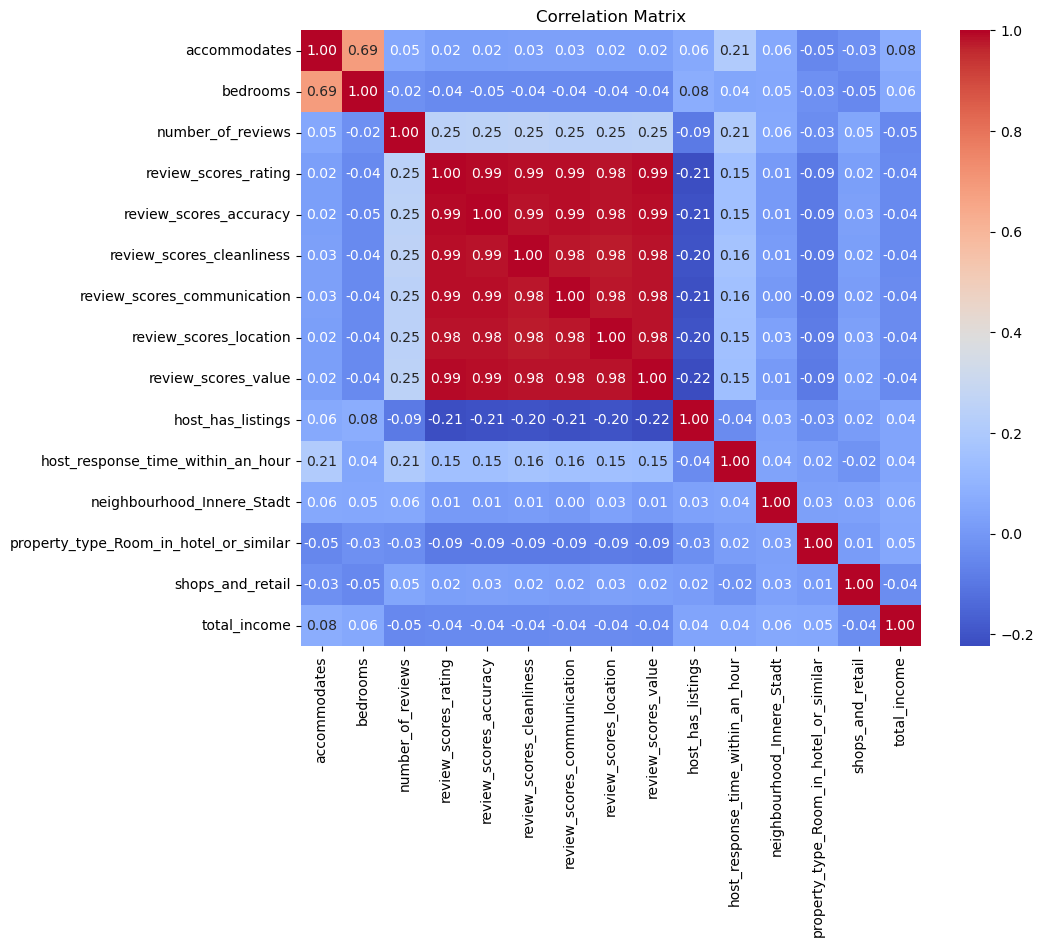

In [165]:
correlation = df[[ 'accommodates', 'bedrooms', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_has_listings',
       'host_response_time_within_an_hour', 'neighbourhood_Innere_Stadt',
       'property_type_Room_in_hotel_or_similar', 'shops_and_retail','total_income']]
corr_matrix = correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Define models
models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, max_depth=6, min_child_weight=2, gamma=0, random_state=42)
}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -cv_scores.mean()  
    std_mse = cv_scores.std()

    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{name}:")
    print(f"Cross-Validation Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
    print(f"Validation Set MSE: {val_mse:.4f}")
    print(f"Validation Set R-squared: {val_r2:.4f}")
    print(f"Test Set MSE: {test_mse:.4f}")
    print(f"Test Set R-squared: {test_r2:.4f}\n")


Random Forest Regressor:
Cross-Validation Mean MSE: 8883723810.0989 ± 1676370294.2867
Validation Set MSE: 7155230402.9085
Validation Set R-squared: 0.0512
Test Set MSE: 6457073781.5686
Test Set R-squared: -0.5571

XGBoost Regressor:
Cross-Validation Mean MSE: 7669915760.4457 ± 2101199155.9493
Validation Set MSE: 6124549432.2529
Validation Set R-squared: 0.1879
Test Set MSE: 9508156379.8360
Test Set R-squared: -1.2929

